# Programming Exercise 1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Simple Octave/MATLAB function

本部分提供了使用Octave/MATLAB实现单位矩阵的方法。代码如下。
```m
A = eye(5);
```
而在numpuy中使用`numpy.eye(5)`方法实现单位矩阵。

In [2]:
# A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix
def warmUpExercise():
    A = np.eye(5)
    return A

In [3]:
# ==================== Part 1: Basic Function ====================
print('Running warmUpExercise ... \n');
print('5x5 Identity Matrix: \n');
A = warmUpExercise()
print(A);

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2 Linear regression with one variable

本部分使用单变量实现线性回归，以预测在特定城市部署食物餐车的利润。

**数据说明：**  

文件`ex1data1.txt`包含了该线性回归问题所需的数据。数据集第一列表示城市人口；第二列表示该城市食物餐车的盈利。数据集中的负值表示数据缺失。

### 2.1 Plotting the Data

In [4]:
# 数据集导入
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
# print(data)
X = data[:,0]
y = data[:,1]
m = len(y) # number of training examples

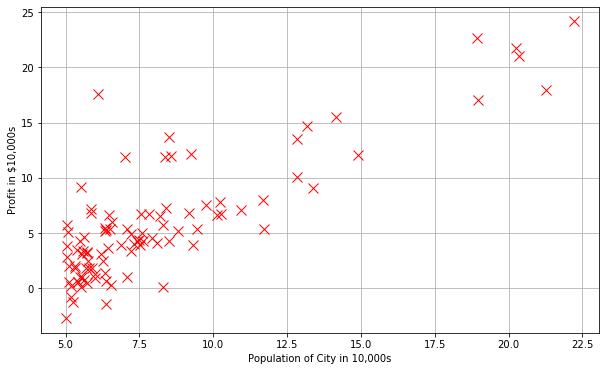

In [5]:
# 绘图
plt.figure(figsize=(10,6))
plt.plot(X, y, 'rx', markersize=10)
# plt.xlim(4,24)
# plt.ylim(-5,25)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

### 2.2 Gradient Descent

In [6]:
X = np.concatenate((np.ones((m,1)), X.reshape(m,1)), axis=1) #  Add a column of ones to X
theta = np.zeros((2,1)) # initialize fitting parameters

In [7]:
iterations = 1500
alpha = 0.01

In [8]:
#### computing the cost J(θ)
def computeCost(X, y, theta):
    J = 0
    for i in range(m):
        J += np.square(np.dot(X[i,:], theta) - y[i])
    J *= 1./(2*m)
    return J

print('\nTesting the cost function ...')
# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0;0]\nCost computed = ',J[0])
print('Expected cost value (approx) 32.07')
# further testing of the cost function
J = computeCost(X, y, np.array([[-1],[2]]))
print('\nWith theta = [-1;2]\nCost computed = ',J[0])
print('Expected cost value (approx) 54.24')


Testing the cost function ...
With theta = [0;0]
Cost computed =  32.072733877455654
Expected cost value (approx) 32.07

With theta = [-1;2]
Cost computed =  54.24245508201238
Expected cost value (approx) 54.24


In [9]:
#### Gradient desscent
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters,1))
    for iter in range(num_iters):
        theta_temp = np.zeros(len(theta))
        for i in range(m):
            theta_temp += (np.dot(X[i,:], theta) - y[i]) * X[i,:]
        theta -= alpha/m*theta_temp.reshape(len(theta),1)
        J_history[iter] = computeCost(X, y, theta)
    return theta, J_history    
    
print('\nRunning Gradient Descent ...')
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:');
print(theta);
print('Expected theta values (approx)');
print(' -3.6303\n  1.1664\n');


Running Gradient Descent ...
Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
 -3.6303
  1.1664



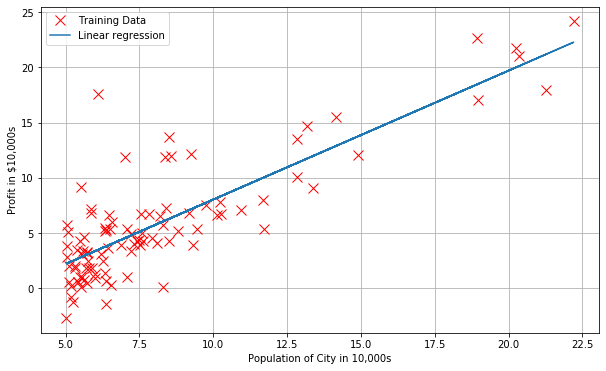

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944714


In [10]:
# 绘图
plt.figure(figsize=(10,6))
plt.plot(X[:,1], y, 'rx', markersize=10, label='Training Data')
plt.plot(X[:,1], X.dot(theta),'-',label='Linear regression')
# plt.xlim(4,24)
# plt.ylim(-5,25)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1,3.5]).dot(theta)
print('For population = 35,000, we predict a profit of',predict1[0]*10000)
predict2 = np.array([1,7]).dot(theta)
print('For population = 70,000, we predict a profit of',predict2[0]*10000)


### 2.3 Debugging

### 2.4 Visualizing J(θ)

In [11]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]],
                      [theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, t)

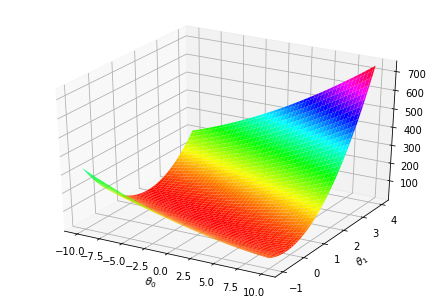

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
Xv, Yv = np.meshgrid(theta0_vals, theta1_vals,indexing='ij')# 注意indexing = 'ij'
surf = ax.plot_surface(Xv, Yv, J_vals, cmap=plt.get_cmap('hsv'))
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()

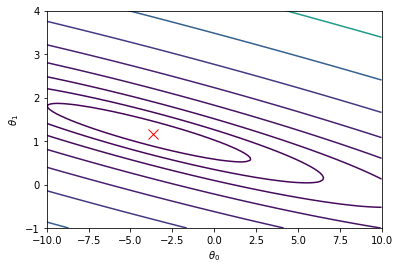

In [13]:
plt.figure()
plt.contour(Xv, Yv, J_vals,np.logspace(-2,3,20))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(theta[0],theta[1], 'rx', ms=10, linewidth=2)

## 3 Linear regression with multiple variables

本部分使用多变量线性回归预测房价。

**数据说明：**  

文件`ex1data2.txt`包含了该线性回归问题所需的数据。数据集第一列表示房屋大小(平方表示)；第二列表示房间数量;第三列表示房屋价格。

### 3.1 Feature Normalization

In [14]:
# 数据集导入
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,2]
m = len(y)

In [15]:
def featureNormalize(X):
    X_norm = X
    mu = np.zeros(X.ndim)
    sigma = np.zeros(X.ndim)
    
    for col_i in range(X.ndim):
        mu[col_i] = np.mean(X_norm[:,col_i])
        sigma[col_i] = np.std(X_norm[:,col_i])
        X_norm[:,col_i] = (X_norm[:,col_i] - mu[col_i]) / sigma[col_i]
    return X_norm, mu, sigma
# Scale features and set them to zero mean
X, mu, sigma = featureNormalize(X)

In [16]:
# Add intercept term to X
X = np.concatenate((np.ones((m,1)), X.reshape(m,X.ndim)), axis=1)

### 3.2 Gradient Descent

In [17]:
iterations = 400
alpha = 0.01
theta = np.zeros((3, 1))

In [18]:
#### computing the cost J(θ)
def computeCostMulti(X, y, theta):
    J = np.dot((np.dot(X, theta) - y.reshape(len(y),1)).T, (np.dot(X, theta) - y.reshape(len(y),1)))
    J *= 1./(2*m)
    return J

print('\nTesting the cost function ...')
# compute and display initial cost
J = computeCostMulti(X, y, theta)
print('With theta = [0;0;0]\nCost computed = ',J)


Testing the cost function ...
With theta = [0;0;0]
Cost computed =  [[6.55915481e+10]]


In [19]:
#### Gradient desscent
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters,1))
    for iter in range(num_iters):
        theta -= alpha/m * np.dot(X.T, (np.dot(X, theta)-y.reshape(len(y),1)))
        J_history[iter] = computeCostMulti(X, y, theta)
    return theta, J_history    
    
print('\nRunning Gradient Descent ...')
# run gradient descent
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:');
print(theta);


Running Gradient Descent ...
Theta found by gradient descent:
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


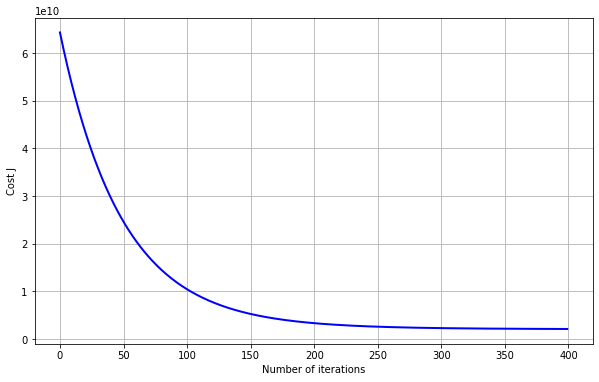

In [20]:
# Plot the convergence graph
plt.figure(figsize=(10,6))
plt.plot(range(len(J_history)), J_history, 'b-', linewidth=2)
plt.grid(True)
# plt.ylim(min(J_history),max(J_history))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [21]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = np.array([1, (1650-mu[0])/sigma[0], (3-mu[1])/sigma[1]]).dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n'
      ,price[0])

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 289221.5473712181


### 3.3 Normal Equations

In [22]:
# 数据集导入
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,2]
m = len(y)
# Add intercept term to X
X = np.concatenate((np.ones((m,1)), X.reshape(m,X.ndim)), axis=1)

In [23]:
def normalEqn(X, y):
    theta = np.zeros((X.ndim, 1))
    
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.reshape(len(y),1))
    
    return theta

# Calculate the parameters from the normal equation
theta = normalEqn(X, y);
# Display normal equation's result
print('Theta computed from the normal equations:')
print(theta)

Theta computed from the normal equations:
[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


In [24]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = np.array([1, 1650, 3]).dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n'
      ,price[0])

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 293081.46433489426
